In [16]:
import numpy as np
import pandas as pd
from bokeh.plotting import save, figure, show
import matplotlib.pyplot as plt

In [39]:
labels = pd.Series(['green', 'blue', 'green', 'blue'])
points = np.array([[1,1],[2,2],[1,1],[1,1]])

data = pd.DataFrame(points, columns=("x", "y"))
data["label"] = labels
unique_labels = np.unique(labels)
num_labels = unique_labels.shape[0]
hhist, hedges = np.histogram(points[:, 0], bins=2)
print(hedges)

[1.  1.5 2. ]


0    1
2    1
Name: x, dtype: int32
1    2
3    1
Name: x, dtype: int32


(array([[2., 0.],
        [3., 1.]]),
 array([1. , 1.5, 2. ]),
 <a list of 2 BarContainer objects>)

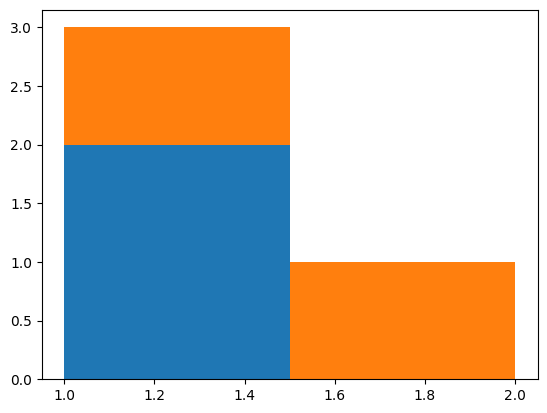

In [46]:
#plt.hist([data["g"]])
gre = data[data["label"] == "green"]["x"]
blu = data[data["label"] == "blue"]["x"]
print(gre)
print(blu)
np.histogram(gre, bins=hedges)
plt.hist([gre, blu], bins=hedges, stacked=True)

In [74]:
from bokeh.palettes import HighContrast3, HighContrast, Category20

bucket_ref = list(map(str, hedges))[:-1]
gre_hist = np.histogram(gre, bins=hedges)
blu_hist = np.histogram(blu, bins=hedges)
plot_data = { 'hedges': bucket_ref,
              "green": [gre_hist[0][0], gre_hist[1][0]],
              "blue": [blu_hist[0][0], blu_hist[1][0]],
              }
print(plot_data)
ph = figure(x_range=bucket_ref)
ph.vbar_stack(["green", "blue"], source=plot_data, x='hedges', color=HighContrast3[:2])
show(ph)

{'hedges': ['1.0', '1.5'], 'green': [2, 1.0], 'blue': [1, 1.0]}


[[ 0.51764541  0.68070501  1.09358682]
 [-0.12393542 -0.26226133  1.40147339]
 [-1.23309417 -0.39785245  1.80755962]
 [-0.22570127 -0.5150061  -0.45501417]
 [-0.26882336  0.41354937  2.54799831]
 [ 1.05410696  0.31189151  0.86711871]
 [-0.28658549 -0.14553382  0.80177693]
 [ 0.76363031  1.33939638 -0.12644264]
 [-0.40224441 -0.74185747 -0.72805732]
 [ 0.12092146 -0.59749541  1.10168186]]


(array([[ 1.,  0.,  5.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
        [ 1.,  3.,  8.,  1.,  3.,  2.,  2.,  0.,  0.,  0.],
        [ 1.,  4., 10.,  1.,  3.,  4.,  5.,  0.,  1.,  1.]]),
 array([-1.23309417, -0.85498492, -0.47687568, -0.09876643,  0.27934282,
         0.65745207,  1.03556132,  1.41367056,  1.79177981,  2.16988906,
         2.54799831]),
 <a list of 3 BarContainer objects>)

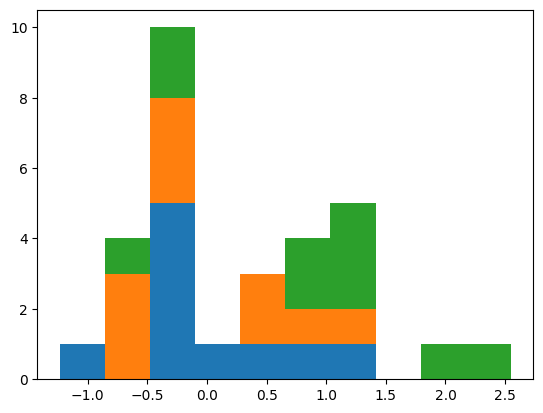

In [33]:
x = np.random.randn(10, 3)
print(x)
plt.hist(x, bins=10, stacked=True)